In [1]:
from scipy import io

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

mnist = io.loadmat('mnist-original.mat')
X = mnist['data'].T
y = mnist['label'].reshape(70000,)

X.shape
y.shape

C:\Users\ausle\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(70000,)

## Visualisation

(-0.5, 27.5, 27.5, -0.5)

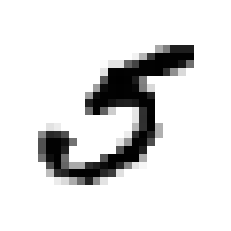

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_img = some_digit.reshape(28,28)
plt.imshow(some_digit_img, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

## Simple Classification with SGD

In [3]:
import numpy as np
shuffle_index = np.random.permutation(60000)
test_index = list(set(range(70000)) - set(shuffle_index))
X_train, y_train = X[shuffle_index], y[shuffle_index]
X_test, y_test = X[test_index], y[test_index]
len(X_train)
len(X_test)

60000

10000

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train == 5) # y_train get an array of booleans 
sgd_clf.predict([some_digit]) # true

## Cross Validation

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skf = StratifiedKFold(n_splits=5, random_state=42) #split to 5 portions, train 80%, test 20%

y_train_5 = (y_train == 5)
for train_index, test_index in skf.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) #clones previous classifier with all params
    X_train_f, X_test_f, y_train_f, y_test_f = X_train[train_index], X_train[test_index], y_train_5[train_index], y_train_5[test_index]
    
    clone_clf.fit(X_train_f, y_train_f)
    y_pred = clone_clf.predict(X_test_f)
    n_correct = sum(y_pred == y_test_f)
    print(n_correct/len(y_pred))
    

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

0.9633363886342805


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

0.9585833333333333


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

0.9621666666666666


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

0.9659166666666666


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

0.9674139511625969


In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring='accuracy')

array([0.95083743, 0.92016667, 0.96241667, 0.96808333, 0.96466372])

## why accuracy is not a good measure
consider all training/test data, 5 accounts for only 10%. if guess always not 5, accuracy will still be above 90%

In [63]:
from sklearn.base import BaseEstimator
class AlwaysZeroClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

cross_val_score(AlwaysZeroClassifier(), X_train, y_train_5, cv=5, scoring='accuracy')

array([0.91083333, 0.91133333, 0.90991667, 0.906     , 0.91016667])

## Confusion Matrix

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [9]:
confusion_matrix(y_train_5, y_train_pred)
# Predicted
# Neg|Pos
# TN | FP (Actual Negatives)
# FN | TP (Actual Positives)
"perfect"
confusion_matrix(y_train_5, y_train_5)

array([[54004,   575],
       [ 1903,  3518]], dtype=int64)

'perfect'

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision: How many out of all predictions we got right

precision = TP/(TP + FP)

### Recall: How many out of all positives we got right

recall = TP/(TP + FN)

### F1: harmonic mean of precision and recall

weights more on lower values, can only be high if both precision and recall is high

F1 = 2/(1/precision + 1/recall) 

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)
f1_score(y_train_5, y_train_pred)

0.8595162472514049

0.648957756871426

0.7395417279798193

In [11]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')

Text(0.5, 0, 'Threshold')

(0, 1)

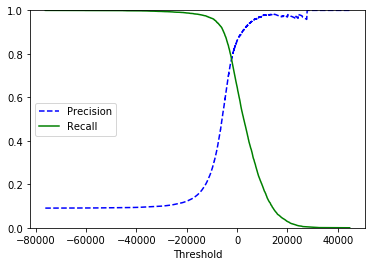

In [12]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
plt.xlabel("Threshold")
plt.legend(loc='center left')
plt.ylim([0, 1])

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

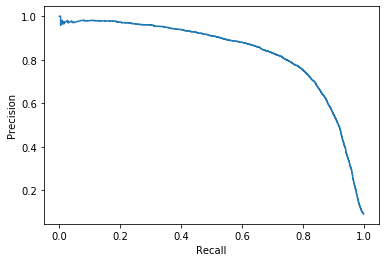

In [13]:
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

## ROC - Receiver Operating Characteristics

ROC curve is basically TP Rate (Recall) vs FP Rate. 

[0, 1, 0, 1]

Text(0.5, 0, 'false positive')

Text(0, 0.5, 'true positive')

0.9616178149067114

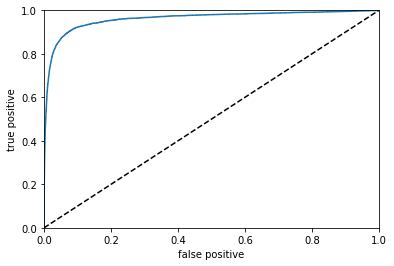

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel('false positive')
plt.ylabel('true positive')

roc_auc_score(y_train_5, y_scores)

### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

# predict_prob for binary class: 1st column proba for class 0, 2nd column for class 1
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

d:\python\mnist\.env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\python\mnist\.env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\python\mnist\.env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9929334825988492

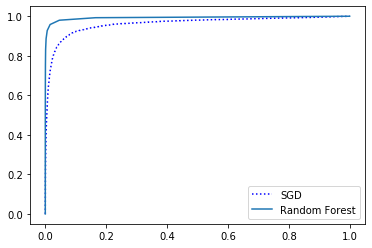

In [23]:
y_scores_forest = y_proba_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest =roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label = "SGD")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc='lower right')
roc_auc_score(y_train_5, y_scores_forest)

## Multiclass Classification

One Vs All - 1 class at a time vs others. argmax the highest probablyt
One Vs One - Class each pairs

Typically OvA as it is less combo. OvO is Nx(N-1)/2 classifiers to train.

In [26]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

array([5.])

In [30]:
np.argmax(sgd_clf.decision_function([some_digit]))

5

In [32]:
forest_clf.fit(X_train, y_train)
np.argmax(forest_clf.predict_proba([some_digit]))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

5

In [39]:
## scaling will help improve accuracy.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
X_train_scaled = StandardScaler().fit_transform(X_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.8744751 , 0.8880944 , 0.88053208])

## Error Analysis

In [40]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

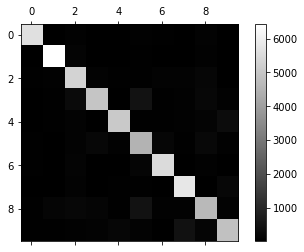

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mx, cmap=plt.cm.gray)
fig.colorbar(cax)

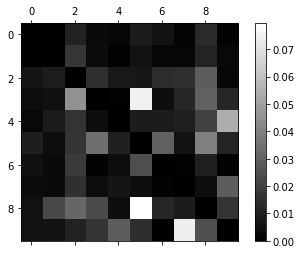

In [54]:
row_sums = conf_mx.sum(axis = 1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(norm_conf_mx, cmap=plt.cm.gray)
fig.colorbar(cax)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

## Multi-label classification

In [58]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train > 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train, y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

array([[5., 0., 1.]])

## Multioutput Classification

Combination of multi-lable and multi-class

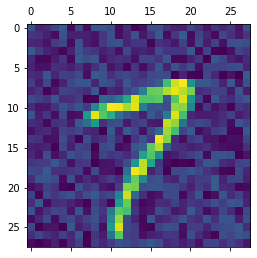

In [62]:
# Adding noise to training data
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noiseso

y_train_mod = X_train
y_test_mod = X_test

plt.matshow(X_train_mod[36000].reshape(28,28), cmap = matplotlib.cm.binary, interpolation='nearest')

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
forest_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

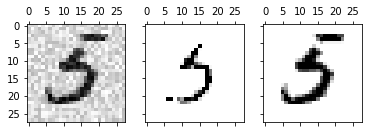

In [70]:
test = knn_clf.predict([X_test_mod[125]])
fig, ax = plt.subplots(1, 3, sharey=True)

ax[0].matshow(X_test_mod[125].reshape(28, 28), cmap = matplotlib.cm.binary, interpolation='nearest')
ax[1].matshow(test.reshape(28, 28), cmap = matplotlib.cm.binary, interpolation='nearest')
ax[2].matshow(y_test_mod[125].reshape(28, 28), cmap = matplotlib.cm.binary, interpolation='nearest')

## Grid Search 


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

param_grid = [{'n_neighbors': [2,5,10], 'weights': ['uniform', 'distance']}]
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', verbose=10)
X_train_scaled = StandardScaler().fit_transform(X_train)

In [ ]:
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_neighbors=2, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [22]:
## shift image a little when training improves also accuracy. (data augumentation or training set expance)

from scipy.ndimage.interpolation import shift
def shift_mnist_img(minst, direction, by_pix=1, plot=False):    
    if direction == 'up':
        ret = shift(minst.reshape(len(minst), 28, 28), (0, -1, 0))
    elif direction == 'down':
        ret = shift(minst.reshape(len(minst), 28, 28), (0, 1, 0))
    elif direction == 'left':
        ret = shift(minst.reshape(len(minst), 28, 28), (0, 0, -1))
    elif direction == 'right':
        ret = shift(minst.reshape(len(minst), 28, 28), (0, 0, 1))        
    return ret.reshape(len(minst), 784)

X_train_up = shift_mnist_img(X_train, 'up')
X_train_down = shift_mnist_img(X_train, 'down')
X_train_left = shift_mnist_img(X_train, 'left')
X_train_right = shift_mnist_img(X_train, 'right')

X_train_new = np.vstack((X_train, X_train_down, X_train_up, X_train_left, X_train_right))
y_train_new = np.concatenate((y_train, y_train,      y_train,    y_train,      y_train), axis=None)

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42)

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')
cross_val_score(sgd_clf, X_train_new, y_train_new, cv=3, scoring='accuracy')



array([0.87482503, 0.85684284, 0.87353103])

ValueError: Found input variables with inconsistent numbers of samples: [300000, 5]

In [ ]:
cross_val_score(sgd_clf, X_train_new, y_train_new, cv=3, scoring='accuracy')

In [30]:
len(y_train_new)

300000